In [19]:
# chess imports
import chess
import chess.pgn

# animation imports
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# my functions
from utility_functions import *

# other
import numpy as np
from icecream import ic

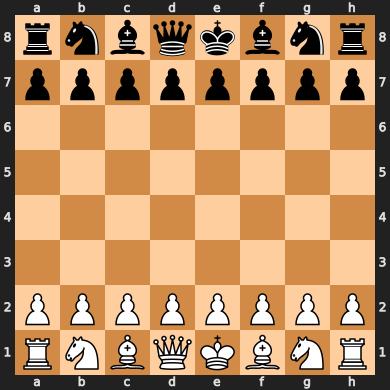

In [20]:
with open("games_db/CollinMakuza vs EKChessMasterProject.pgn") as pgn_file:
    game = chess.pgn.read_game(pgn_file)

game.board()

In [5]:
game_df = get_game_as_attack_df(game)
game_df.head()

,white,black
0,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
1,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
2,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
3,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
4,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...","{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."


In [22]:
game_df["white"][0]

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 1,
 9: 1,
 10: 1,
 11: 4,
 12: 4,
 13: 1,
 14: 1,
 15: 1,
 16: 2,
 17: 2,
 18: 3,
 19: 2,
 20: 2,
 21: 3,
 22: 2,
 23: 2,
 24: 0,
 25: 0,
 26: 1,
 27: 0,
 28: 0,
 29: 0,
 30: 1,
 31: 0,
 32: 0,
 33: 1,
 34: 0,
 35: 1,
 36: 0,
 37: 1,
 38: 0,
 39: 1,
 40: 1,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0}

In [6]:
"""
DRAFT

animation
i have to make every frame

create surface plot for each frame

maybe i can make both plots on one figure
for now lets just make one

surface plot

make surface plot for one game state

"""

'\nDRAFT\n\nanimation\ni have to make every frame\n\ncreate surface plot for each frame\n\nmaybe i can make both plots on one figure\nfor now lets just make one\n\nsurface plot\n\nmake surface plot for one game state\n\n'

In [7]:
def square_numb_to_2d_coords(square_numb:int):
    """
    This method translates the chess package's square numbering system to a 2D index
    :param square_numb: square number as described in the package
    :return: [x, y] where x and y are the indices on the array
    """
    return [
        square_numb // 8,
        square_numb % 8
    ]

In [8]:
def coords_to_square_numb(x:int, y:int):
    """
    This method translates 2d array indexes to the chess package's square numbering system
    :param x: array column index
    :param y: array row index
    :return: integer value [0, 64] representing a square on the chess board
    """
    return x * 8 + y

In [9]:
def get_attack_numb_from_2d_coords(X, Y, attack_dict:dict):
    """
    Given meshgrids X and Y, this method creates the values for Z by looking up in the attack dicti
    :param X: meshgrid for X  2D array    
    :param Y: meshgrid for Y  2D array 
    :param attack_dict: dict that contains
    :return: 
    """
    
    Z = coords_to_square_numb(X, Y)
    
    # creates the attack meshgrid by changing values in Z
    for i in range(len(Z)):
        for j in range(len(Z[0])):
            Z[i][j] = attack_dict[Z[i][j]]
    
    return Z

In [10]:
X = np.arange(start=0, stop=8, step=1)
Y = np.arange(start=0, stop=8, step=1)

X, Y = np.meshgrid(X, Y)

Z = get_attack_numb_from_2d_coords(X, Y, game_df["white"][0])

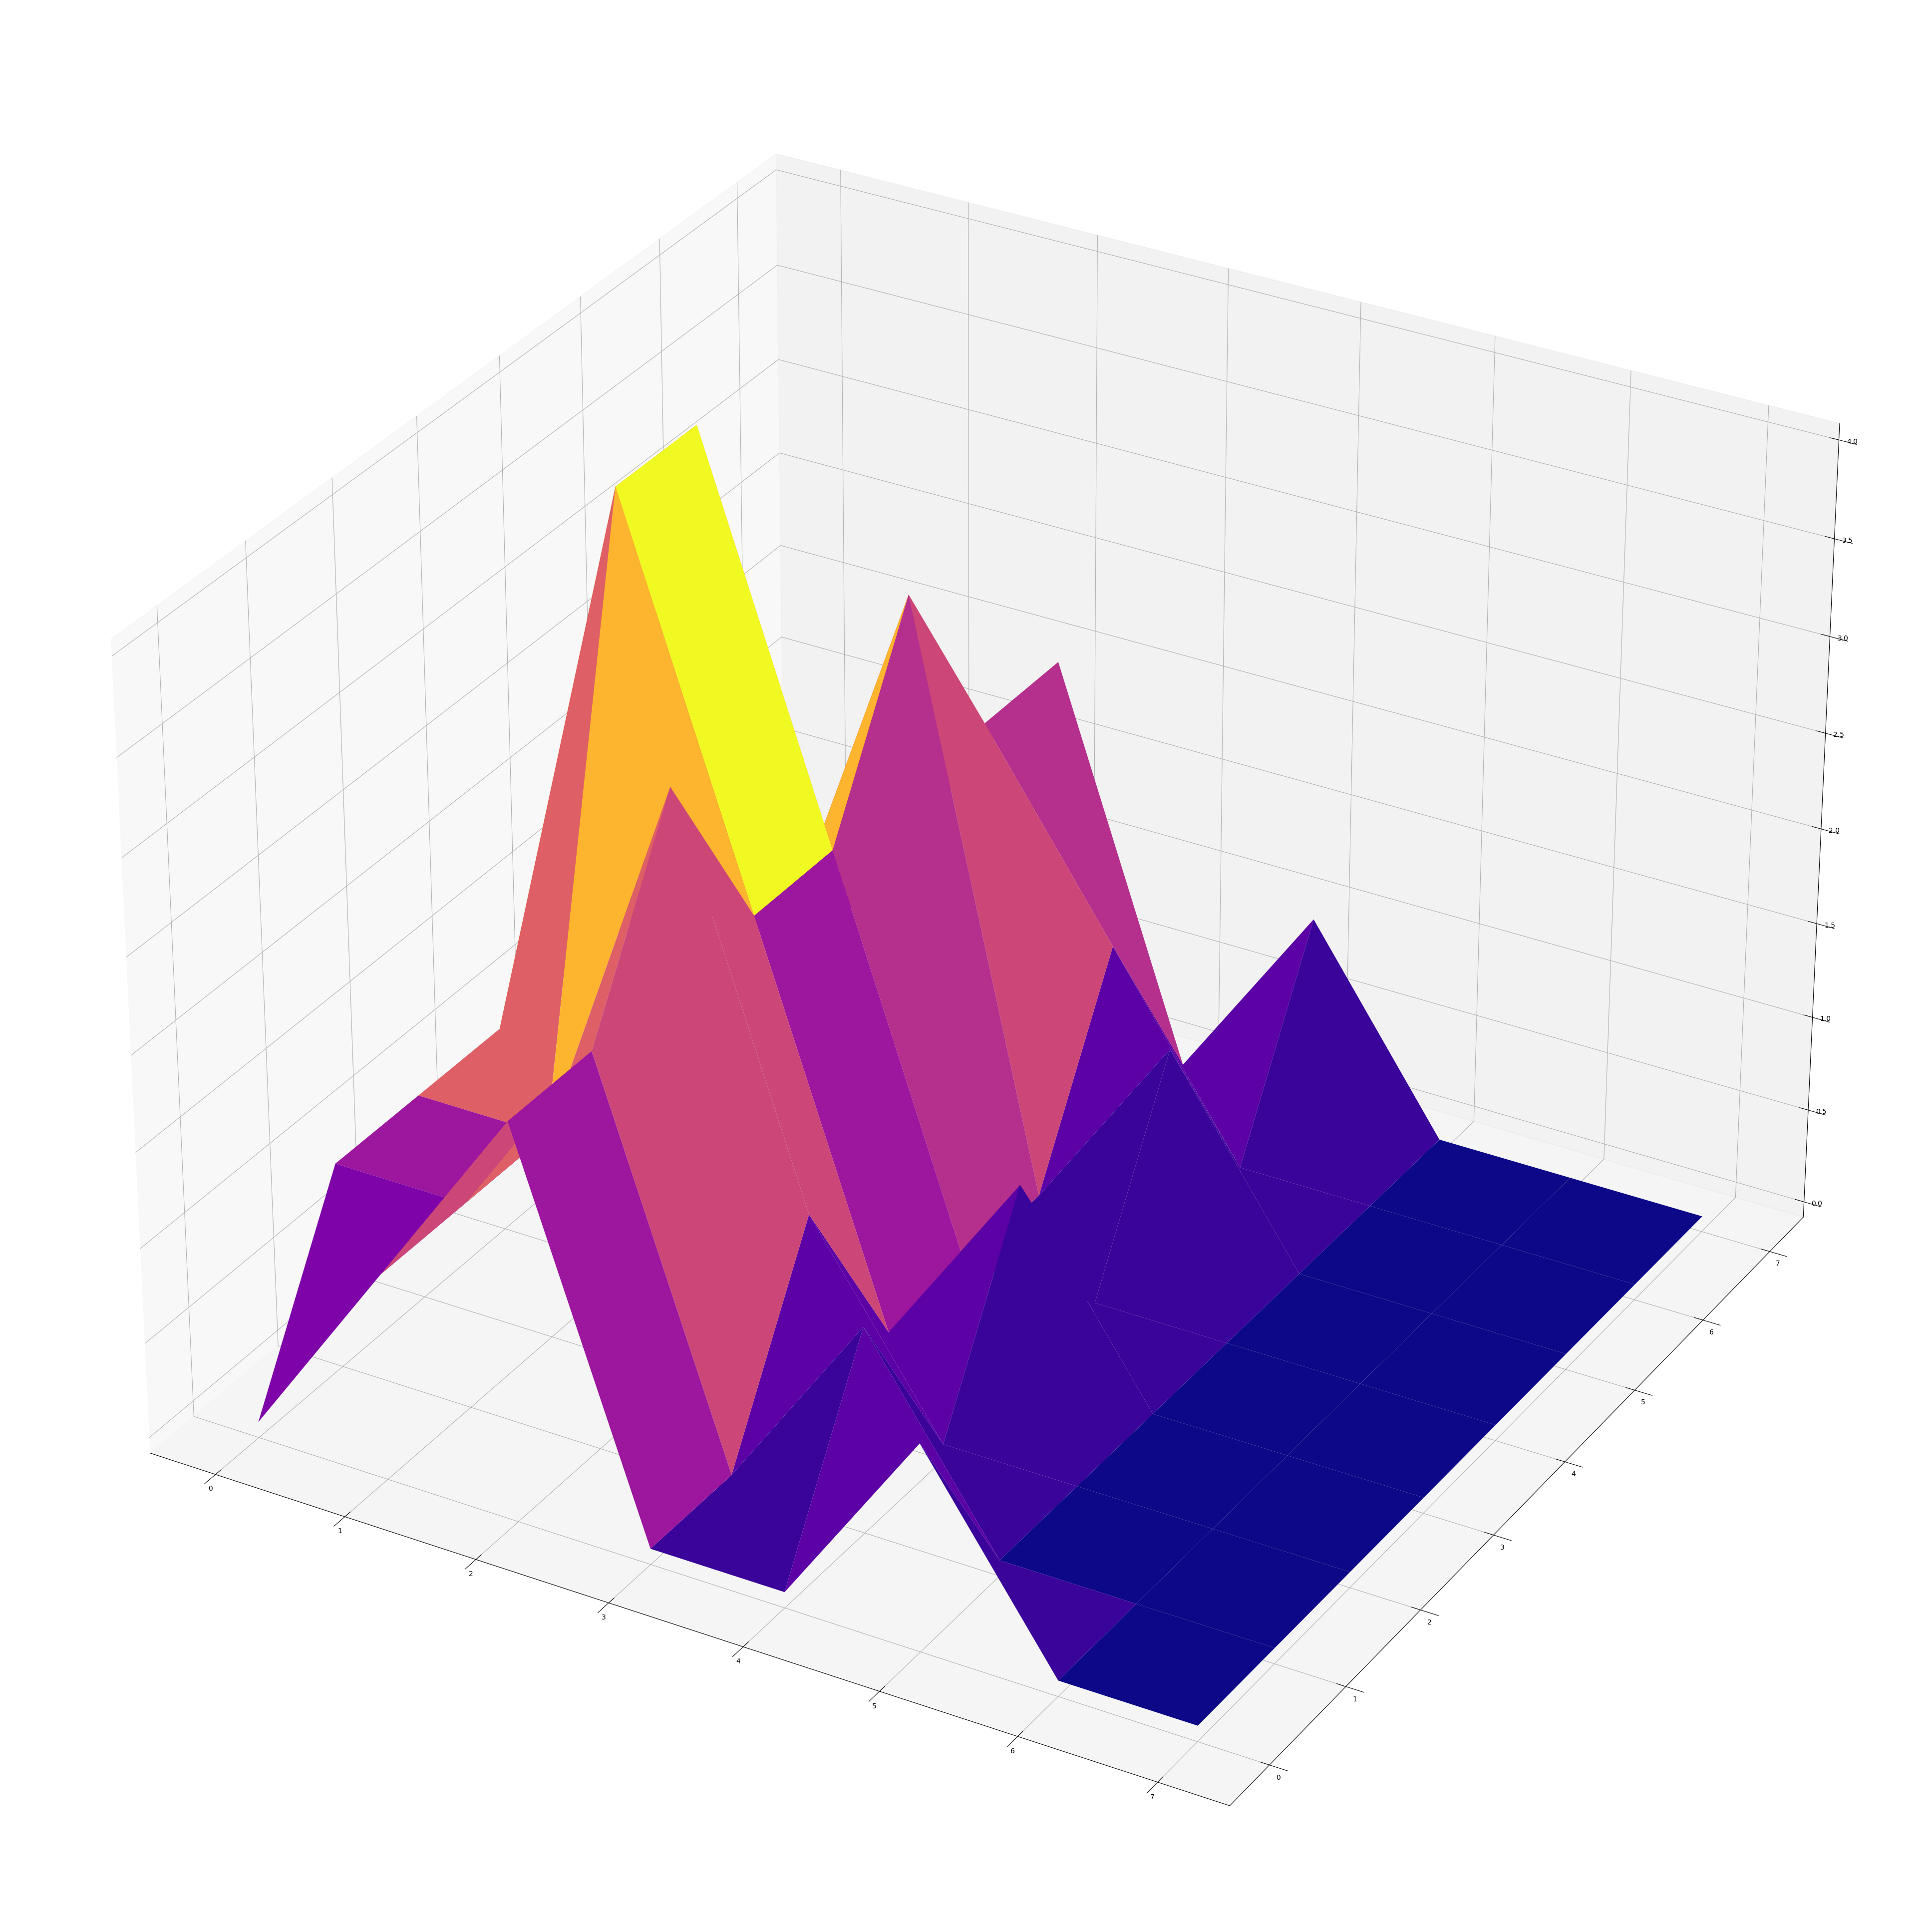

In [23]:
# make animation
fig, ax = plt.subplots(figsize=(50, 50),
                       subplot_kw={"projection": "3d"})

surface = ax.plot_surface(X, Y, Z,
                   cmap= "plasma", shade= True)

plt.show()